# <center> Basic MEEG Preprocessing </center>

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41593-020-00709-0/MediaObjects/41593_2020_709_Fig2_HTML.png?as=webp" alt="image info" />

## Loading data

EEG recording from the mind-brain-body dataset  **[1]** https://ftp.gwdg.de/pub/misc/MPI-Leipzig_Mind-Brain-Body-LEMON/ 

In [1]:
import urllib.request

files = ['sub-010002.eeg', 'sub-010002.vhdr', 'sub-010002.vmrk']
for file in files:
    url = f"https://ftp.gwdg.de/pub/misc/MPI-Leipzig_Mind-Brain-Body-LEMON/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-010002/RSEEG/{file}"
    urllib.request.urlretrieve(url, file)

## Reading EEG files

In [2]:
import mne
raw = mne.io.read_raw_brainvision(files[1])

Extracting parameters from sub-010002.vhdr...
Setting channel info structure...


for the sake of this tutorial, we will only work with the first 120s of data

In [3]:
raw.crop(tmin=60, tmax=180);

In C:\Users\ferat\AppData\Local\Continuum\miniconda3\envs\sci37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ferat\AppData\Local\Continuum\miniconda3\envs\sci37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ferat\AppData\Local\Continuum\miniconda3\envs\sci37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ferat\AppData\Local\Continuum\miniconda3\envs\sci37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotli

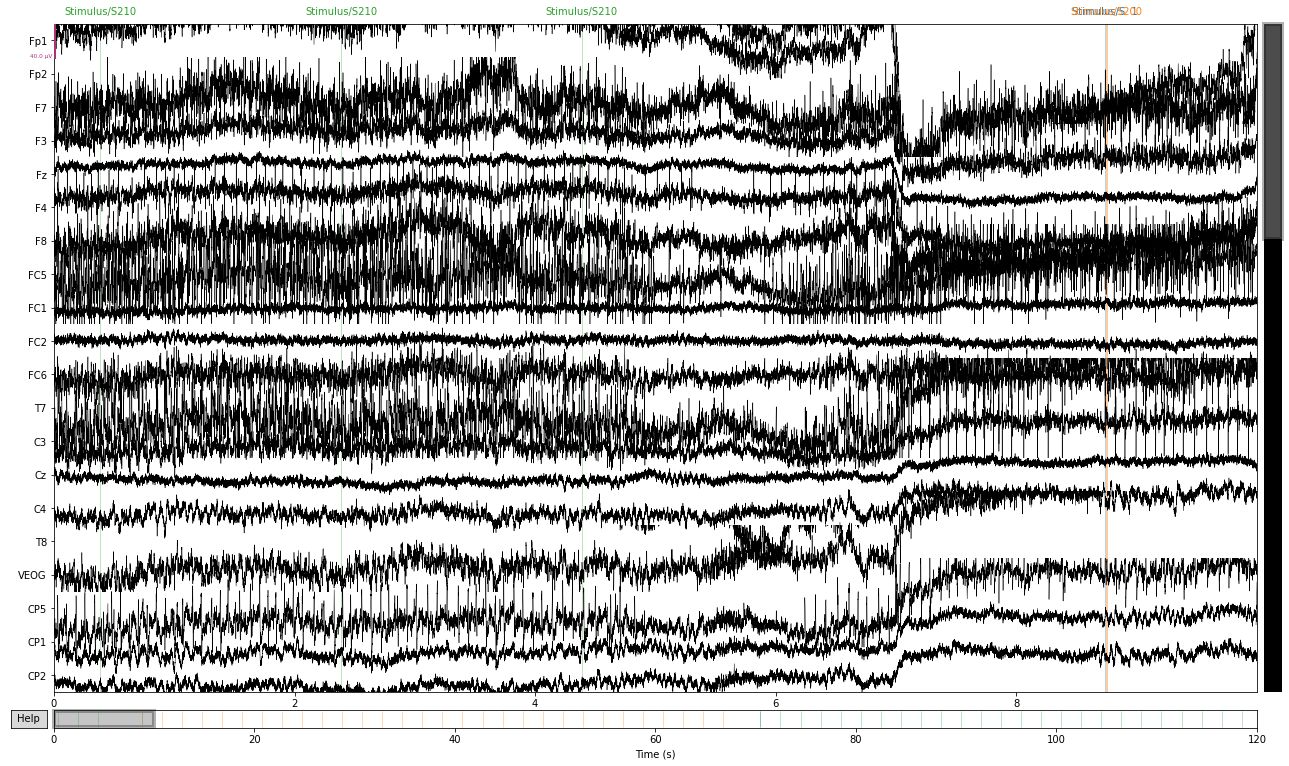

In [4]:
raw.plot();

 ## Working with metadata

In [5]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 62 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2013-11-11 13:47:40 UTC
 nchan: 62
 projs: []
 sfreq: 2500.0 Hz
>

In [6]:
raw.set_channel_types({'VEOG': 'eog'})

<RawBrainVision | sub-010002.eeg, 62 x 300001 (120.0 s), ~66 kB, data not loaded>

In [7]:
raw.info['ch_names']

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'VEOG',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'AFz',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8']

In [8]:
raw.set_montage('standard_1005')

<RawBrainVision | sub-010002.eeg, 62 x 300001 (120.0 s), ~91 kB, data not loaded>

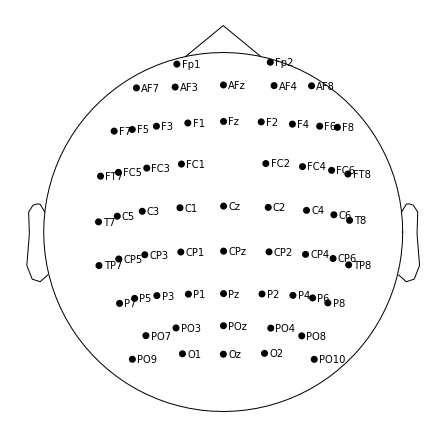

In [9]:
raw.plot_sensors(show_names=True);

## Identification and removal of electrodes and sensors

Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


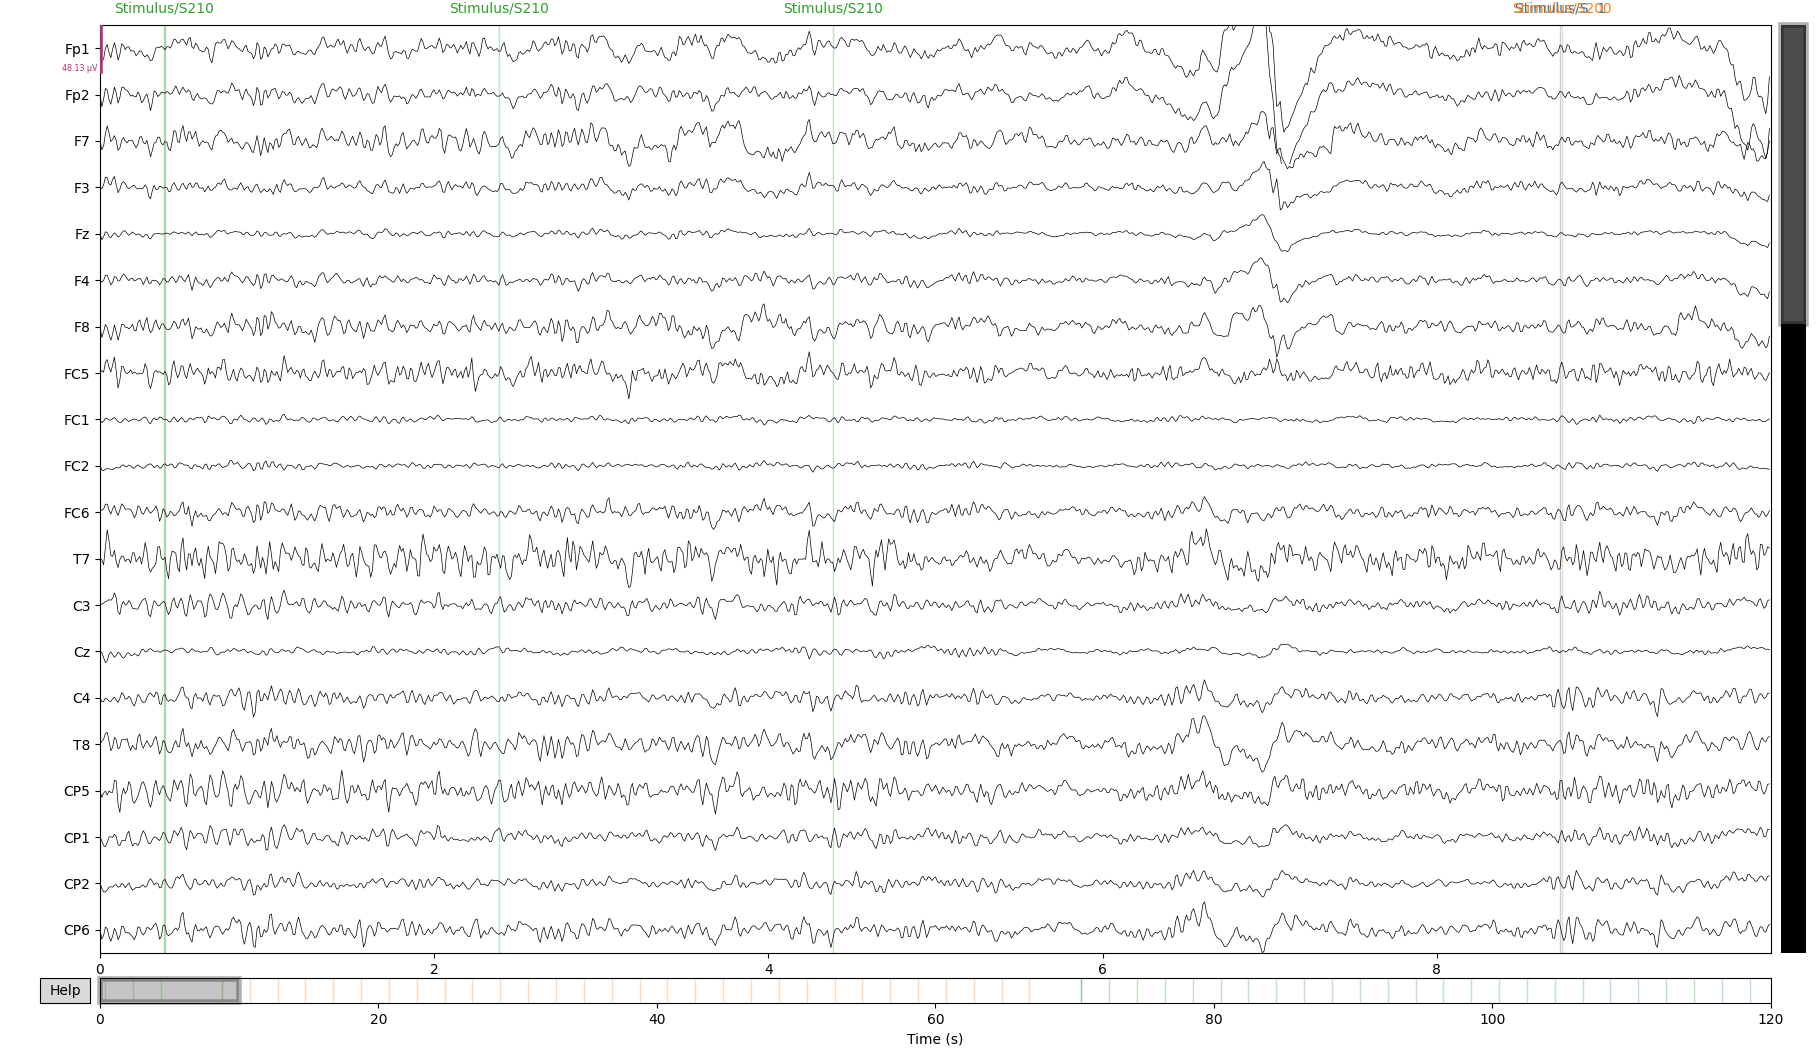

In [10]:
%matplotlib notebook
raw.plot(scalings='auto', highpass=1, lowpass=30);

In [11]:
raw.info['bads'] = ['T7']
raw

<RawBrainVision | sub-010002.eeg, 62 x 300001 (120.0 s), ~91 kB, data not loaded>

## Downsampling

In [12]:
raw.info['sfreq']

2500.0

In [13]:
raw.resample(500)

<RawBrainVision | sub-010002.eeg, 62 x 60000 (120.0 s), ~28.5 MB, data loaded>

## Filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 sec)



<IPython.core.display.Javascript object>


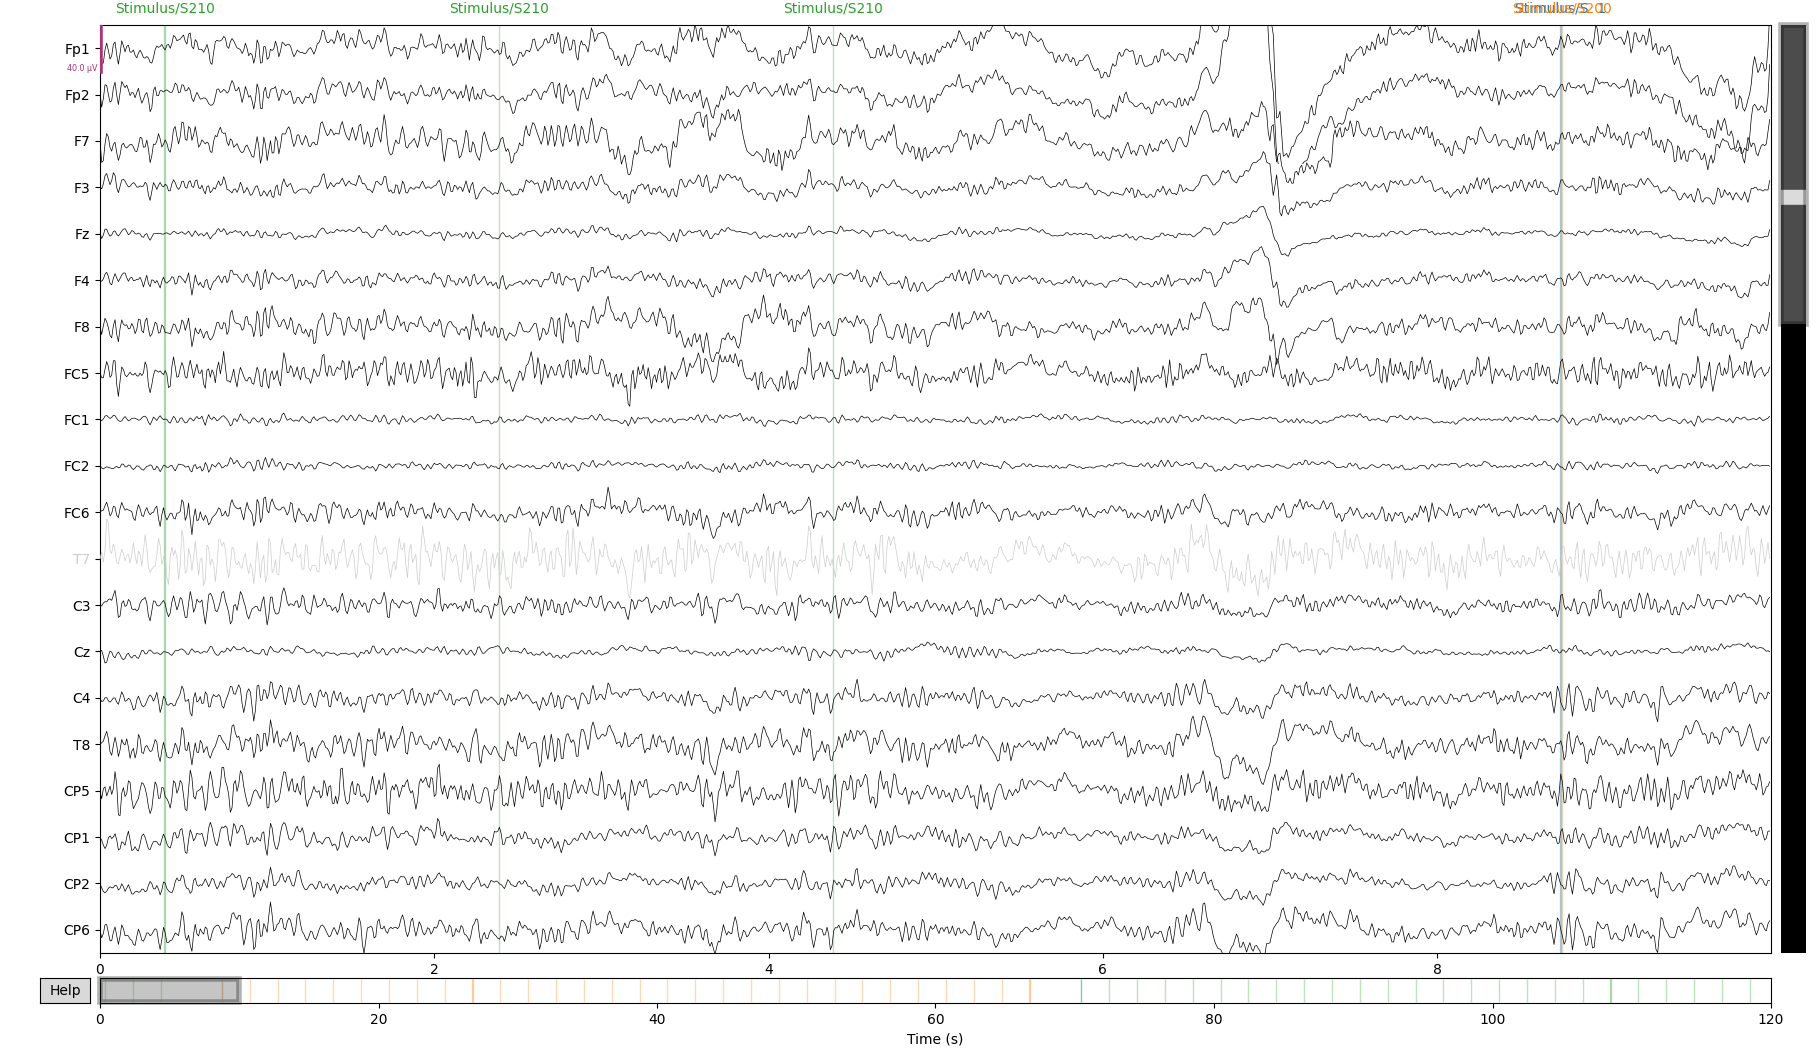

<RawBrainVision | sub-010002.eeg, 62 x 60000 (120.0 s), ~28.5 MB, data loaded>

In [14]:
raw.filter(1.,30., phase='zero-double')
raw.plot()
raw

## Additional removal of physiological artifacts

### ICA

In [15]:
from mne.preprocessing import ICA

ica = ICA(n_components=24, method='infomax', random_state=42)
ica.fit(raw, decim=10)

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 24 components
 


<ipython-input-15-2e4564a64f84>:3: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = ICA(n_components=24, method='infomax', random_state=42)


Fitting ICA took 1.5s.


<ICA | raw data decomposition, fit (infomax): 6000 samples, 24 components, channels used: "eeg">

<IPython.core.display.Javascript object>


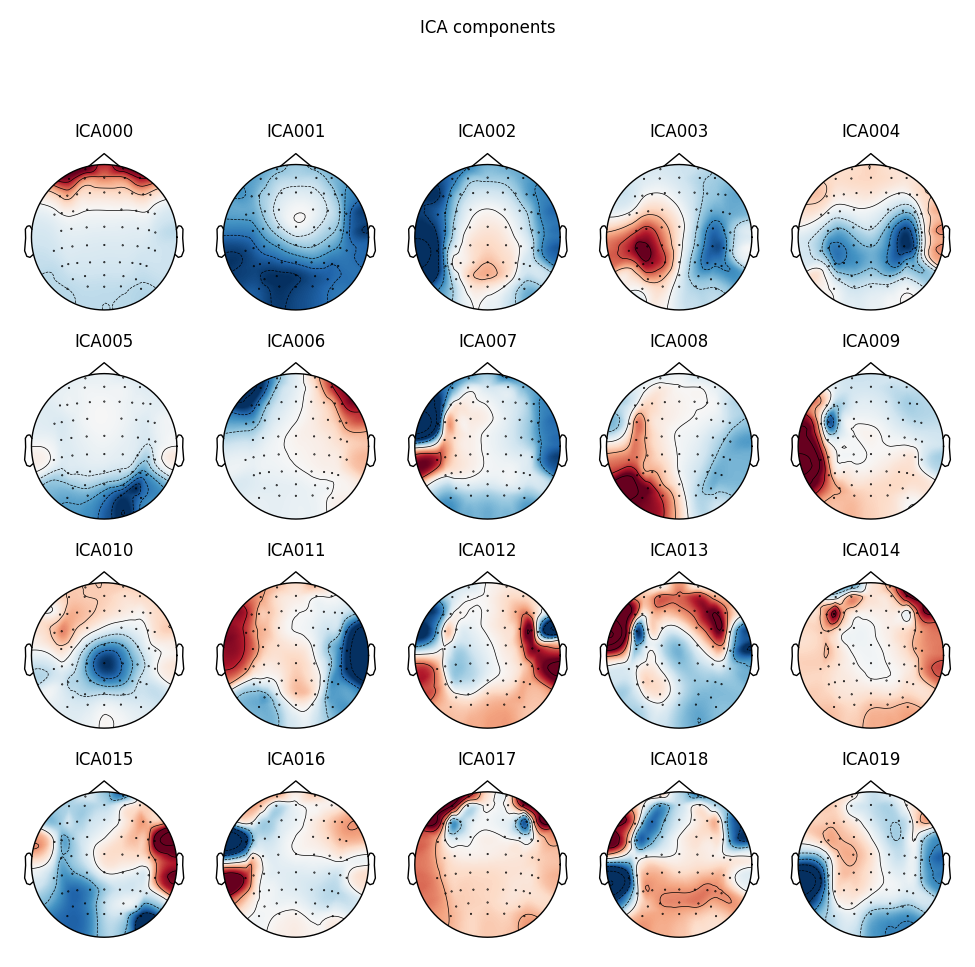

<IPython.core.display.Javascript object>


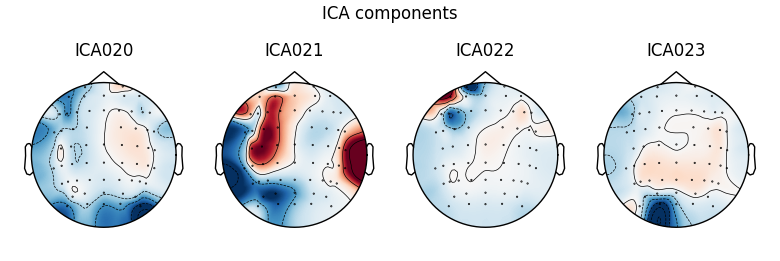

In [16]:
ica.plot_components();

Creating RawArray with float64 data, n_channels=2, n_times=60000
    Range : 30000 ... 89999 =     60.000 ...   179.998 secs
Ready.


<IPython.core.display.Javascript object>


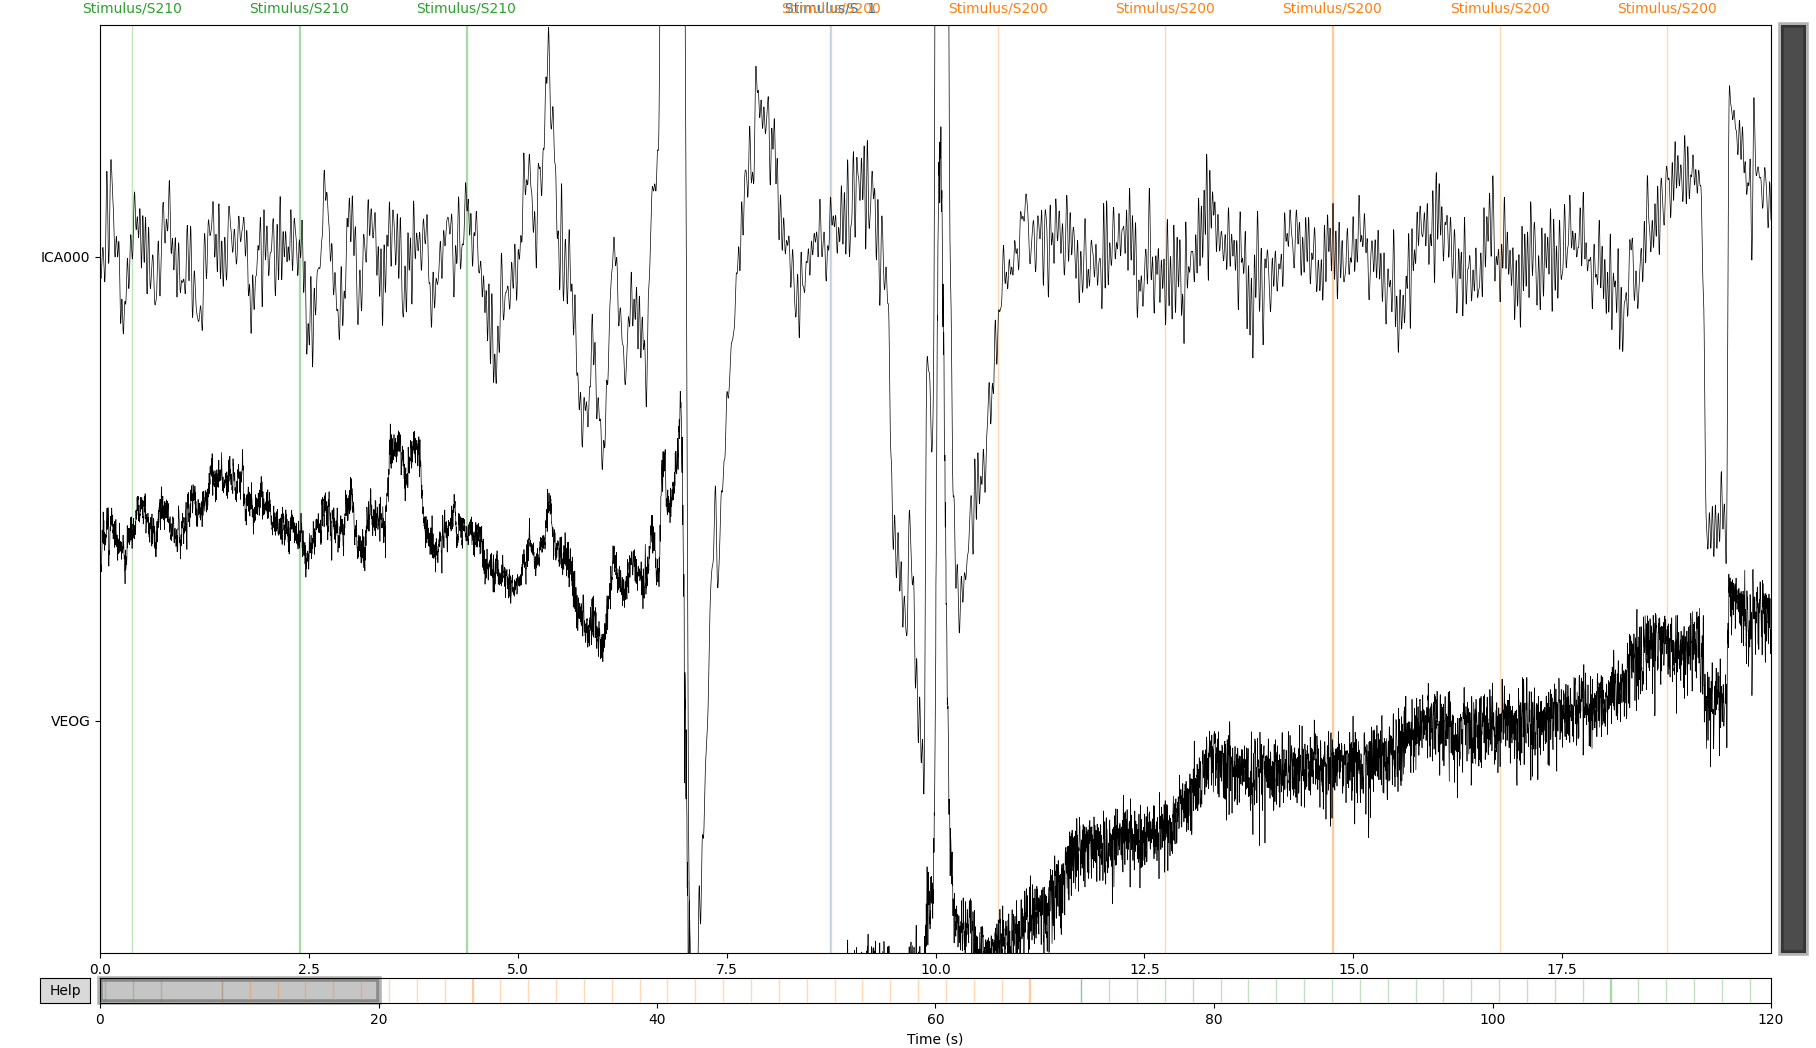

In [17]:
ica.plot_sources(raw, 0);

<IPython.core.display.Javascript object>


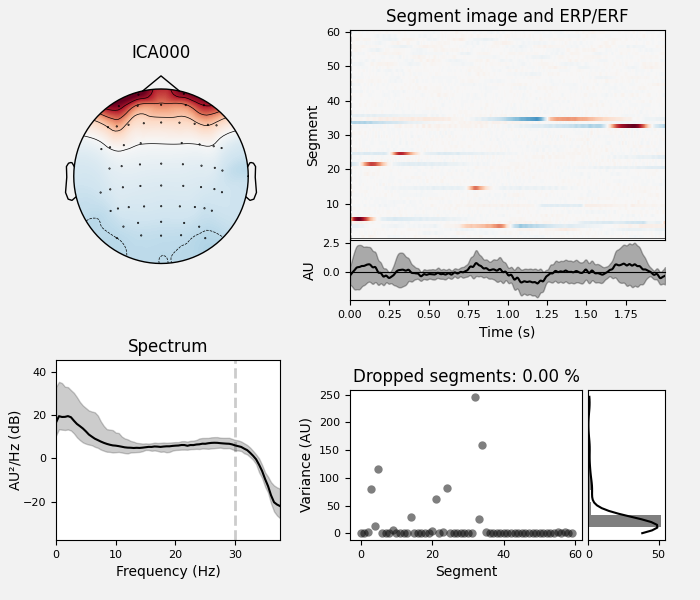

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [18]:
ica.plot_properties(raw, 0);

<IPython.core.display.Javascript object>


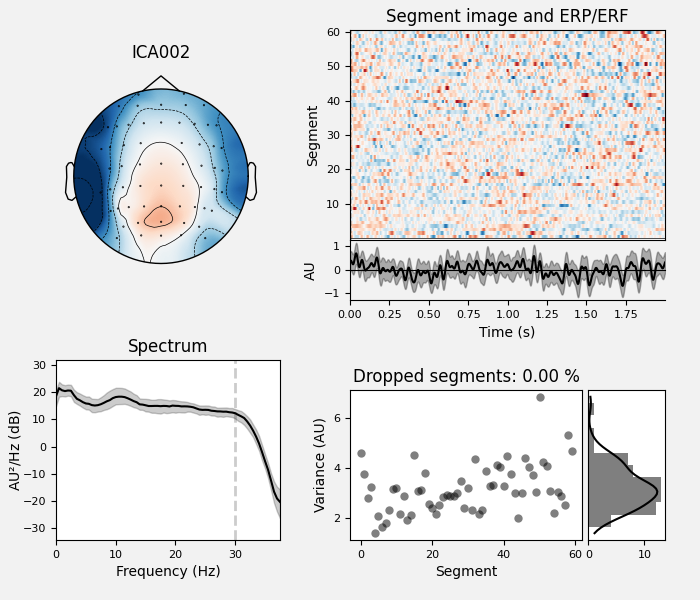

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [19]:
ica.plot_properties(raw, 2);

Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 2 ICA components
    Projecting back using 60 PCA components


<IPython.core.display.Javascript object>


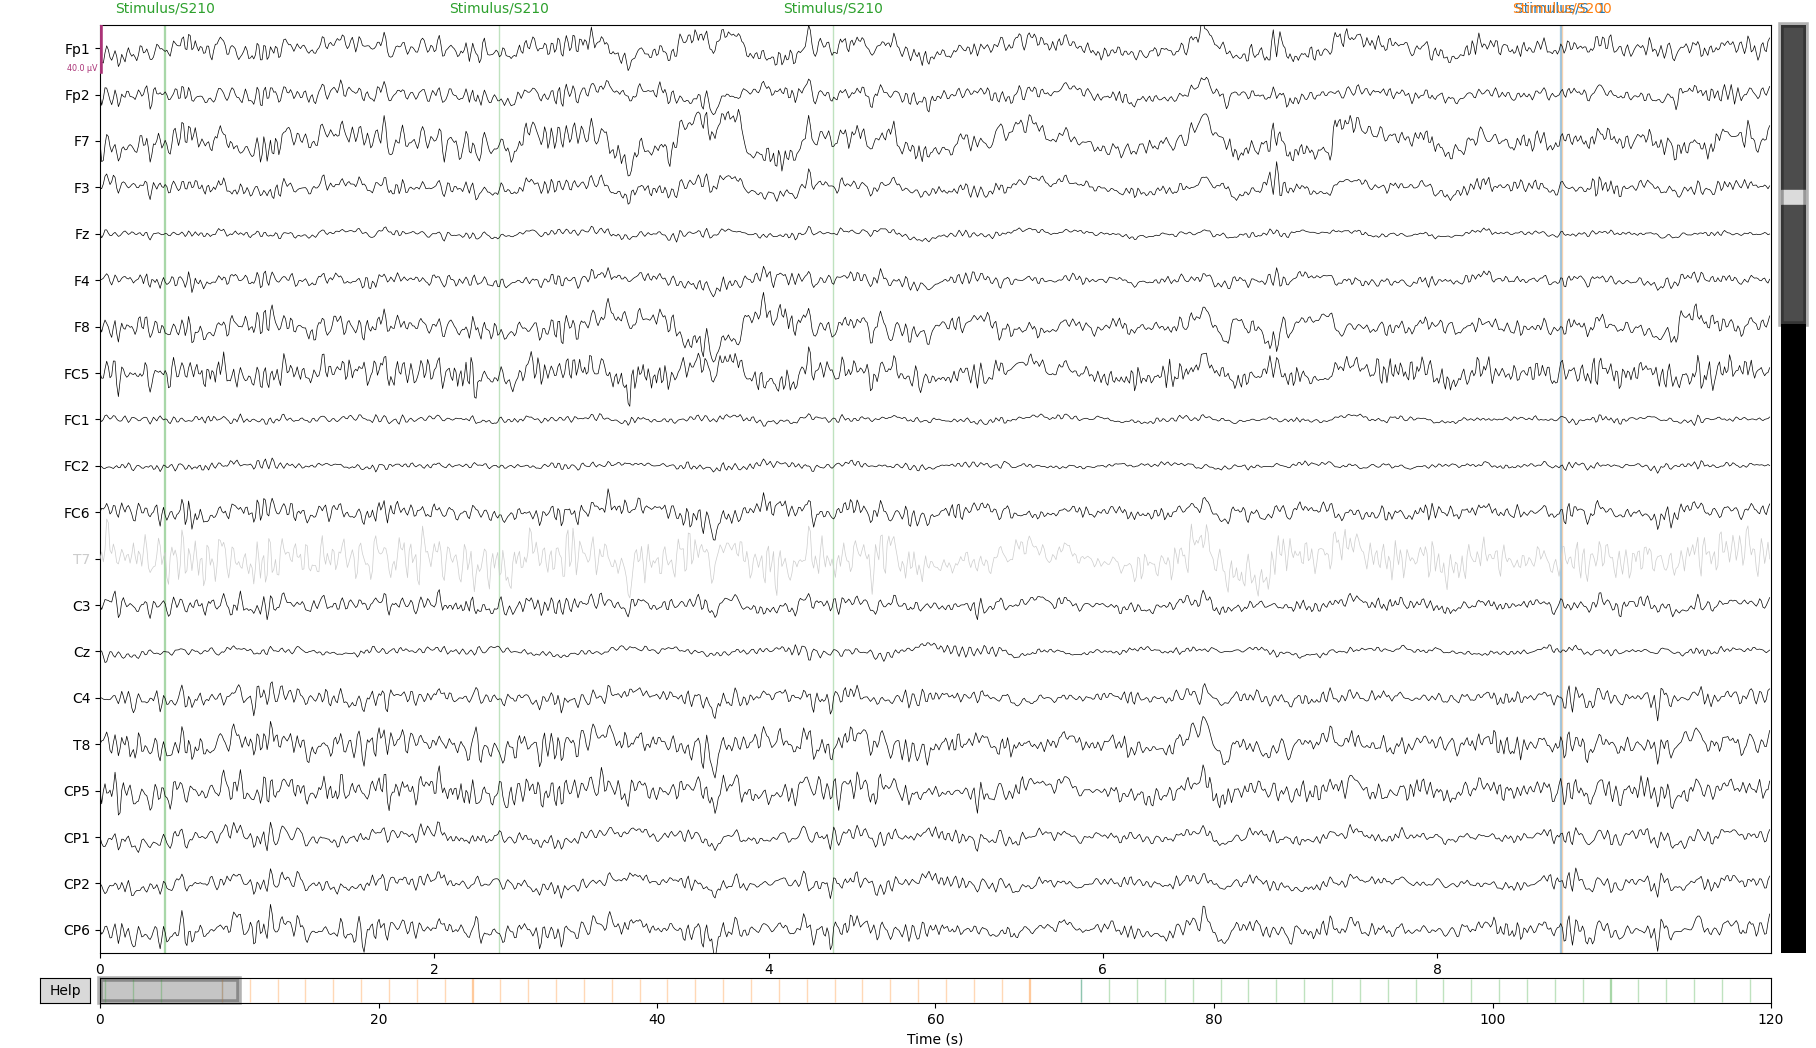

In [20]:
ica.exclude = [0,3]
raw_ica= ica.apply(raw)
raw_ica.plot();

## Interpolate bad channels

In [21]:
raw_ica.interpolate_bads()

Interpolating bad channels
    Automatic origin fit: head of radius 93.8 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors


<RawBrainVision | sub-010002.eeg, 62 x 60000 (120.0 s), ~28.5 MB, data loaded>

<IPython.core.display.Javascript object>


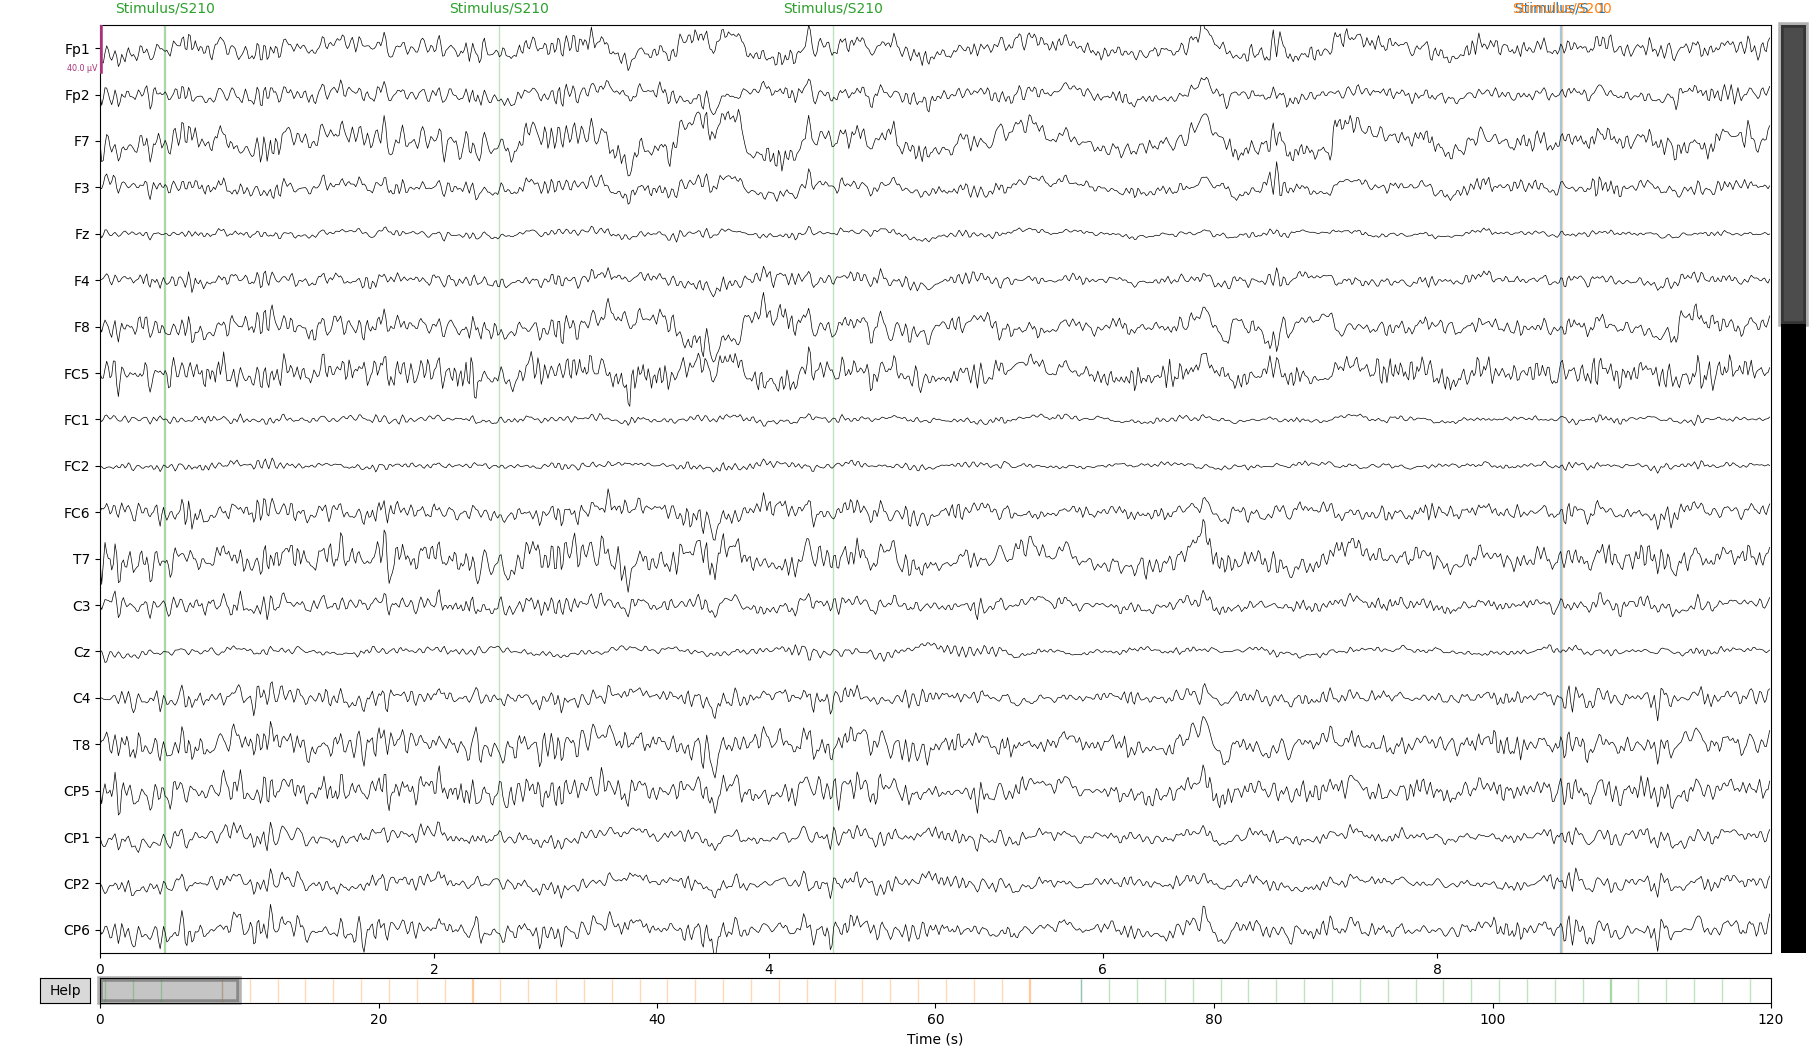

In [22]:
raw.plot();

## Data Segmentation

In [23]:
events_from_annot, event_dict = mne.events_from_annotations(raw_ica)

Used Annotations descriptions: ['Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']


In [24]:
events_from_annot

array([[30193,     0,   210],
       [31193,     0,   210],
       [32193,     0,   210],
       [34369,     0,     1],
       [34374,     0,   200],
       [35374,     0,   200],
       [36374,     0,   200],
       [37374,     0,   200],
       [38374,     0,   200],
       [39374,     0,   200],
       [40374,     0,   200],
       [41374,     0,   200],
       [42374,     0,   200],
       [43374,     0,   200],
       [44374,     0,   200],
       [45374,     0,   200],
       [46374,     0,   200],
       [47374,     0,   200],
       [48374,     0,   200],
       [49374,     0,   200],
       [50375,     0,   200],
       [51375,     0,   200],
       [52375,     0,   200],
       [53375,     0,   200],
       [54375,     0,   200],
       [55375,     0,   200],
       [56375,     0,   200],
       [57375,     0,   200],
       [58375,     0,   200],
       [59375,     0,   200],
       [60375,     0,   200],
       [61375,     0,   200],
       [62375,     0,   200],
       [63

In [25]:
epochs = mne.Epochs(raw_ica, events_from_annot, event_id=event_dict, tmin=0, tmax=2, baseline=(0, 0), event_repeated='drop', preload=True)

Not setting metadata
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 1001 original time points ...
1 bad epochs dropped


<IPython.core.display.Javascript object>


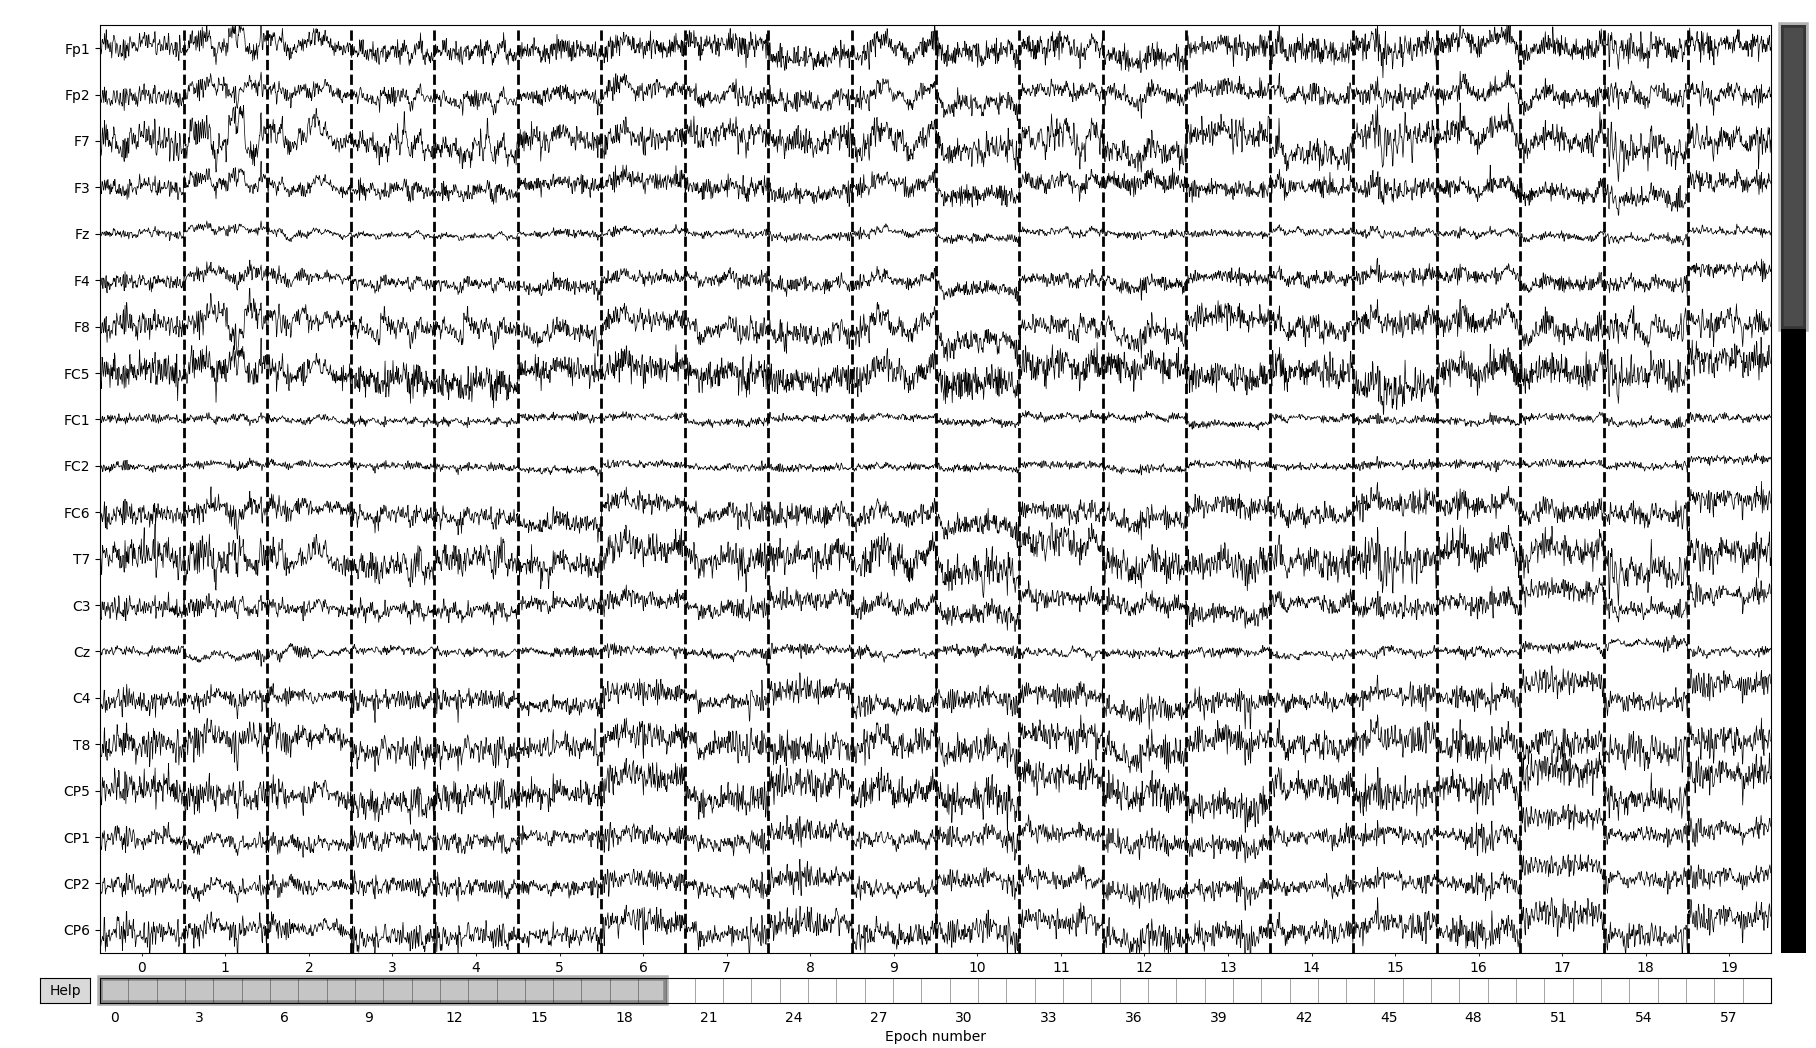

<IPython.core.display.Javascript object>


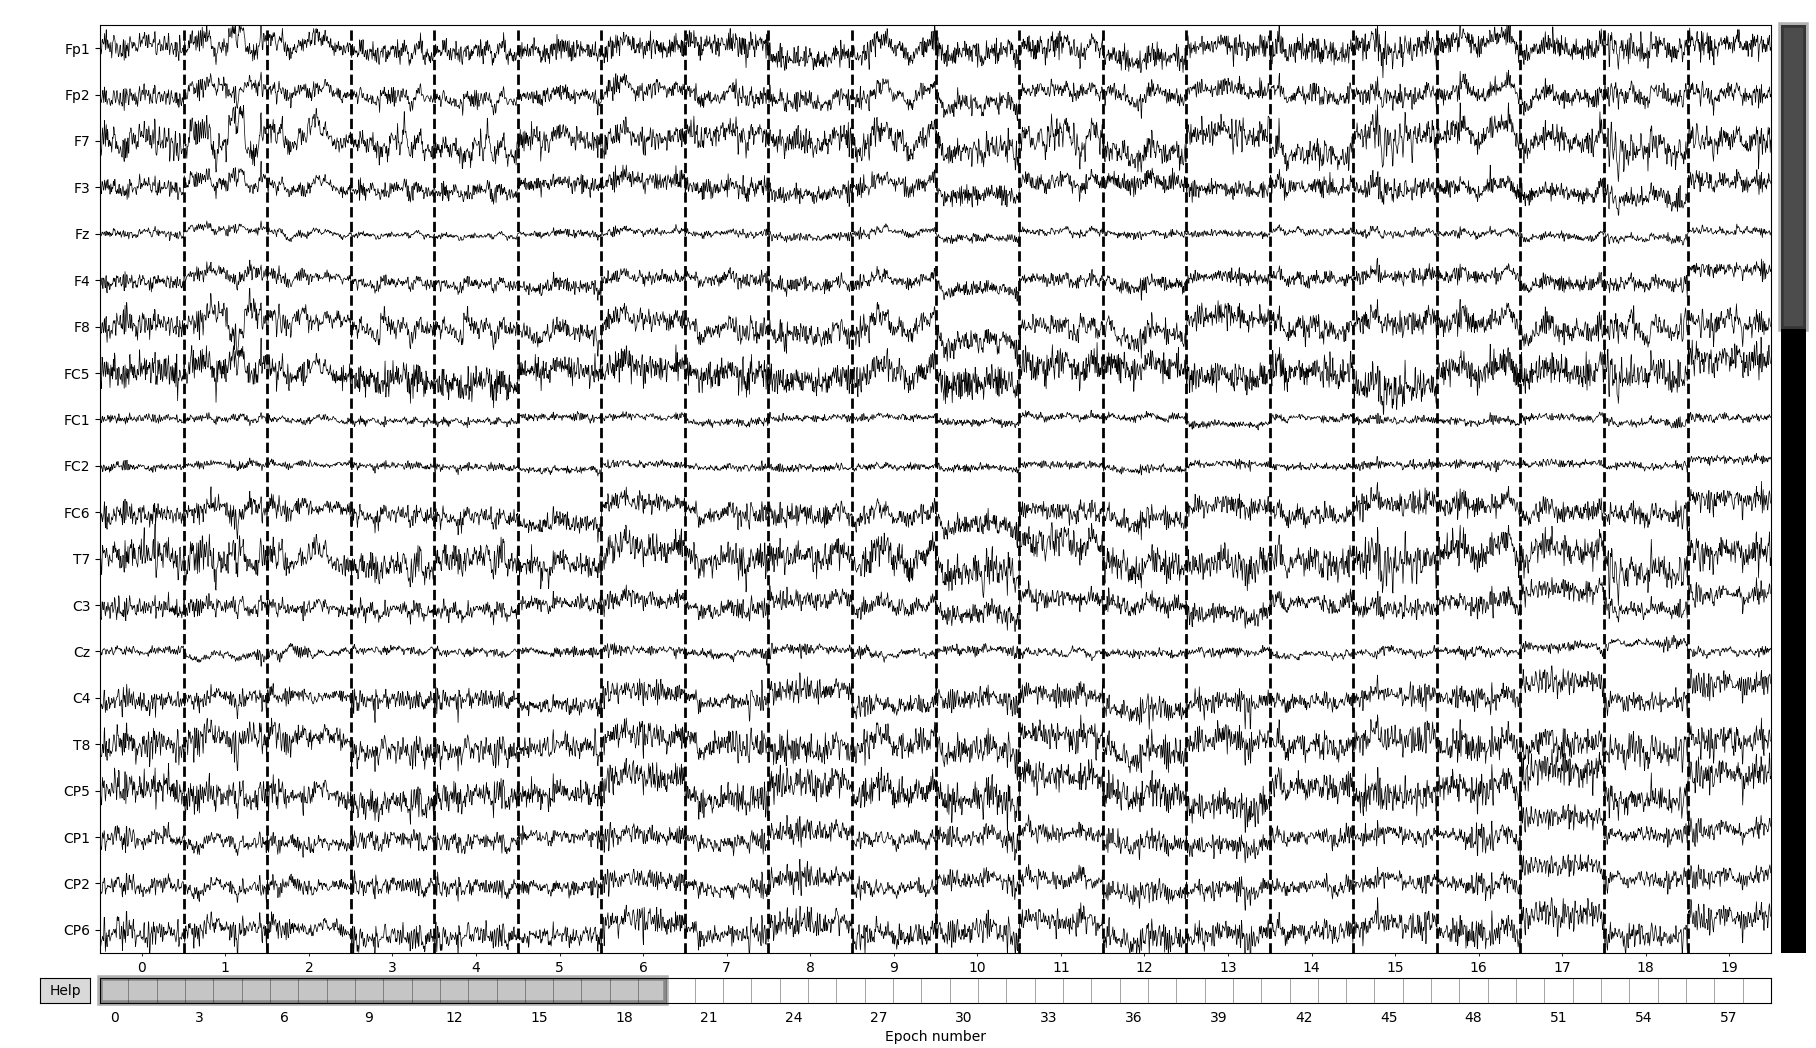

In [26]:
epochs.plot()

## Re-reference

In [27]:
epochs.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<Epochs |  59 events (all good), 0 - 2 sec, baseline 0 – 0 sec, ~28.0 MB, data loaded,
 'Stimulus/S  1': 2
 'Stimulus/S200': 30
 'Stimulus/S210': 27>

## Further analysis...

### PSD

<IPython.core.display.Javascript object>


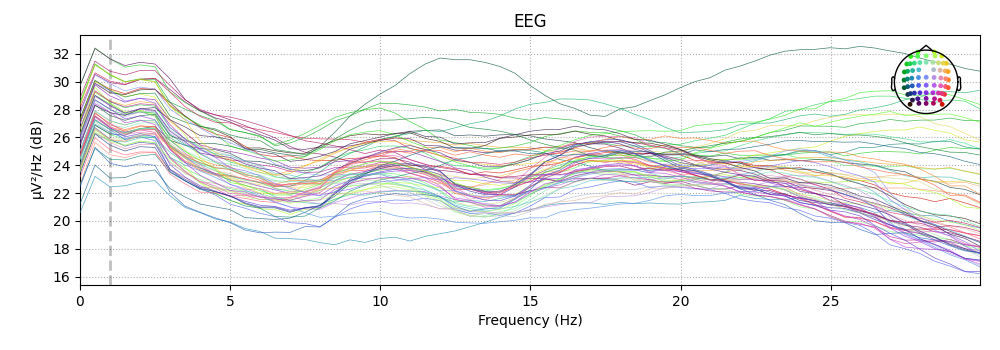

    Using multitaper spectrum estimation with 7 DPSS windows


In [28]:
epochs['Stimulus/S200'].plot_psd(fmin=0, fmax=30);

<IPython.core.display.Javascript object>


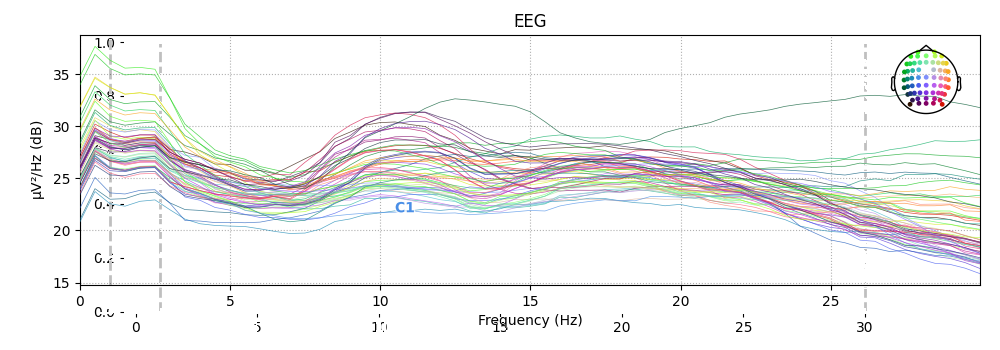

    Using multitaper spectrum estimation with 7 DPSS windows


In [29]:
epochs['Stimulus/S210'].plot_psd(fmin=0, fmax=30);

### Erps..

<IPython.core.display.Javascript object>


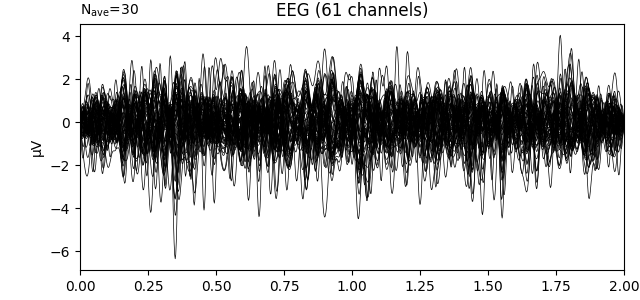

In [30]:
epochs['Stimulus/S200'].average().plot();

# Citations

1. Babayan, A., Erbey, M., Kumral, D. et al. A mind-brain-body dataset of MRI, EEG, cognition, emotion, and peripheral physiology in young and old adults. Sci Data 6, 180308 (2019). https://doi.org/10.1038/sdata.2018.308

2. Pernet, C., Garrido, M.I., Gramfort, A. et al. Issues and recommendations from the OHBM COBIDAS MEEG committee for reproducible EEG and MEG research. Nat Neurosci 23, 1473–1483 (2020). https://doi.org/10.1038/s41593-020-00709-0